In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

import sys

sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

### Test focal region similarity

In [27]:
from Classes.focal_regions import FocalRegion

In [ ]:
region = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
fra = FocalRegion(region)
fra.debug = True

# history = np.array([[1, 0], [0, 1], [0, 1]])
history = np.array([[0], [1], [1]])
print('History:\n', history)
print('-'*60)
scores = fra.get_similarity_scores(history)
print('Scores:\n', scores)
print('-'*60)

In [ ]:
file_name = Path('..', 'LaTeX', 'FRA_region_1.png')
FocalRegion.draw_region(region, file=file_name)

In [ ]:
file_name = Path('..', 'LaTeX', 'history_2.png')
FocalRegion.draw_region(history, file=file_name)

### Test Focal Regions

In [2]:
from Classes.focal_regions import SetFocalRegions

In [3]:
sfr = SetFocalRegions(
    num_agents=3,
    threshold=0.7,
    len_history=2,
    max_regions=10,
    seed=1
)
sfr.generate_focal_regions()
print(sfr)

------------------------------------------------------------
[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
------------------------------------------------------------------------------------------------------------------------
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]]
------------------------------------------------------------


### Test FRA agents

In [5]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.cognitive_model_agents import FocalRegionAgent

In [6]:
free_parameters = {
    'inverse_temperature': 10,
    'len_history': 2,
    'max_regions': 5
}
fixed_parameters = {
    'num_agents': 7,
    'threshold': 0.7,
}
n = 1

In [7]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [FocalRegionAgent(free_parameters, fixed_parameters, n) for n in range(fixed_parameters['num_agents'])]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=20
)

In [8]:
print('Focal regions:')
print(episode.agents[0].sfr)

Focal regions:
------------------------------------------------------------
[[0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1.]
 [0. 1

In [9]:
# episode.agents[0].debug = True
# episode.agents[1].debug = True
episode.run()

<Axes: >

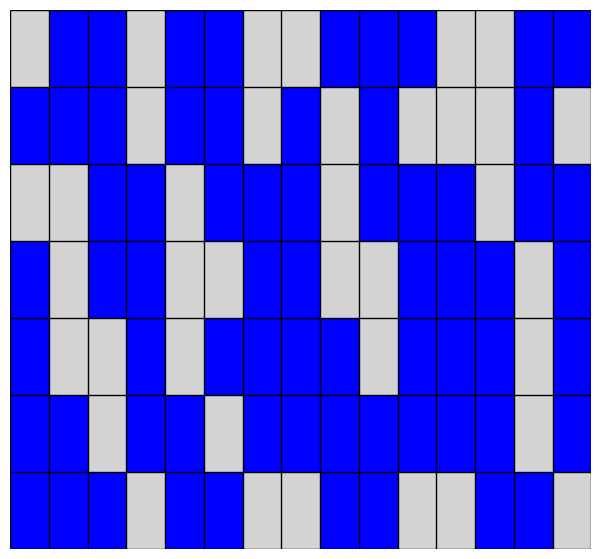

In [10]:
bar.render()

# Test parameter fit

In [17]:
from Classes.parameter_recovery import ParameterFit
from Classes.cognitive_model_agents import Titan

In [16]:
# Create paths for data and results
data_folder = Path('..', 'data', 'human')
folder_2P = Path('..', 'reports', 'MLE')
folder_2P.mkdir(parents=True, exist_ok=True)

file_name = f'best_fit_2P_3.json'
best_fit_file_2P = Path(folder_2P, file_name)

In [18]:
#Load 2P data

file_name = '2-player-UR.csv'
file = data_folder / Path(file_name)
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from ../data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [19]:
# check_out_these = ['Attendance-M2', 'MFP-M2', 'Payoff-M2']
# my_models = [FocalRegionAgent]
my_models = [Titan]

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='scipy',
    hyperparameters={},
    new_file=False
)

Fitting models...:   0%|                                  | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...


Fitting models...: 100%|██████████████████████████| 1/1 [01:29<00:00, 89.04s/it]

Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(6.395882345829693), 'bias': np.float64(0.7482822357561224), 'learning_rate': np.float64(0.2026014149443162), 'len_history': np.float64(1.55113965413542), 'max_regions': np.float64(2.1288555518982184), 'delta': np.float64(0.045007794968442545)}
Deviance: -2243.4695936700286
AIC: 4498.939187340057
--------------------------------------------------


In [ ]:
hyperparameters = {
    'n_iter': 32,
    'init_points': 64,
}

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='bayesian',
    hyperparameters=hyperparameters,
    new_file=False
)

Fitting models...:   0%|                                  | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... |   bias    | learni... | len_hi... | max_re... |   delta   |
-------------------------------------------------------------------------------------------------
| 1         | -3144.443 | 27.272386 | 0.7203244 | 0.0001143 | 1.3023325 | 2.3208030 | 0.0092338 |
| 2         | -4445.302 | 12.734393 | 0.3455607 | 0.3967674 | 1.5388167 | 4.7727506 | 0.0685219 |
| 3         | -2386.740 | 13.880491 | 0.8781174 | 0.0273875 | 1.6704675 | 4.7557432 | 0.0558689 |
| 4         | -6961.277 | 9.8443771 | 0.1981014 | 0.8007445 | 1.9682615 | 3.8208176 | 0.0692322 |
| 5         | -4770.002 | 56.212516 | 0.8946066 | 0.0850442 | 1.0390547 | 2.5284737 | 0.0878142 |
| 6         | -4447.359 | 7.1958505 | 0.4211076 | 0.9578895 | 1.5331652 | 7.2268940 | 0.0315515 |
| 7         | -2648.073 | 44.249558 | 0.8346256 | 0.0182882

Fitting models...: 100%|██████████████████████████| 1/1 [01:14<00:00, 74.14s/it]

| 110       | -3188.477 | 15.562513 | 1.0       | 0.0       | 1.5138704 | 1.0       | 0.0       |
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(13.880491733085599), 'bias': np.float64(0.8781174363909454), 'learning_rate': np.float64(0.027387593197926163), 'len_history': np.float64(1.6704675101784021), 'max_regions': np.float64(4.755743221304143), 'delta': np.float64(0.05586898284457517)}
Deviance: -2386.7407843159963
AIC: 4785.481568631993
--------------------------------------------------
